# Credits
repo:
https://github.com/ajhalthor/Transformer-Neural-Network/tree/main

video:
https://www.youtube.com/watch?v=rPFkX5fJdRY&t=667s

## Self-attetion numerical ex

In [12]:
import numpy as np
import math

In [19]:
# let's define our inputs...for this example, our sentence will have 4 words and your key and value vector will have size 8
L, dk, dv = 4, 8, 8
np.random.seed(42)

q = np.random.randn(L,dk)
k = np.random.randn(L,dk)
v = np.random.randn(L,dv)

In [20]:
print(f'Q\n {q}')
print(f'K\n {k}')
print(f'V\n {v}')

Q
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024
  -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037   1.46564877 -0.2257763
   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
  -0.60170661  1.85227818]]
K
 [[-0.01349722 -1.05771093  0.82254491 -1.22084365  0.2088636  -1.95967012
  -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223]
 [ 0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
   1.03099952  0.93128012]
 [-0.83921752 -0.30921238  0.33126343  0.97554513 -0.47917424 -0.18565898
  -1.10633497 -1.19620662]]
V
 [[ 0.81252582  1.35624003 -0.07201012  1.0035329   0.36163603 -0.64511975
   0.36139561  1.53803657]
 [-0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
   0.09

### Self attetion formula
1. First, we compute the matrix multiplication between Q and K. $Q.K^T$
2. Then we scale this matrix by dK to reduce the variance. $\frac{Q.K^T}{\sqrt{d_k}}$
    1. In the decoder, we need to mask the values
3. Then we take the softmax of these weight values to get probabilities. $Softmax(\frac{Q.K^T}{\sqrt{d_k}})$
4. Finally, we multiply this probability matrix by the V matrix. $Softmax(\frac{Q.K^T}{\sqrt{d_k}}).V$

In [21]:
#first step
np.matmul(q, k.T)

array([[-2.72357421,  0.40818741,  2.39601116, -1.18323729],
       [ 5.60012069,  1.1597874 , -4.7248515 ,  2.43859568],
       [ 1.03699903, -3.70553788, -3.0399309 ,  0.04345596],
       [ 0.09460324,  2.97027193,  0.43247995, -0.80026704]])

In [23]:
#second step
#we need to divide by dk to reduce its variance
scaled  = np.matmul(q, k.T) / np.sqrt(dk)

# let's compare the variance before and after the scaling
print(f'before scaling {np.matmul(q, k.T).var()}')
print(f'after scaling {scaled.var()}')

before scaling 6.8375652409831655
after scaling 0.8546956551228956


In [27]:
#third step
#we compute the softmax of the scaled matrix so all the columns sum to one
def softmax(x):
    return (np.exp(x).T/np.sum(np.exp(x), axis=1)).T

attetion = softmax(scaled)
print(f'Attetion vector\n{attetion}')

Attetion vector
[[0.08431243 0.25513027 0.51521078 0.14534652]
 [0.64059204 0.1332861  0.01664257 0.2094793 ]
 [0.47006414 0.08789379 0.11121405 0.33082801]
 [0.17794451 0.49185018 0.20052305 0.12968226]]


In [30]:
#Final step
#we multiply the attention vector for the values so we get the new values
new_v = np.matmul(attetion, v)
print(f'New values\n {new_v}')

New values
 [[-0.1308104   0.77212573  0.10108921  0.16807328 -0.46588684 -0.43681263
   0.46851458 -0.42075407]
 [ 0.40109276  1.19080398 -0.35037302  0.94668908  0.08274232 -0.53010106
   0.17683369  0.41923385]
 [ 0.17910025  0.98456145 -0.06763014  0.80678092 -0.14453166 -0.49373081
   0.15002954  0.10067088]
 [ 0.01421368  1.14907671 -0.99239485  0.60451701 -0.14600018 -0.40496816
   0.24215067 -0.82777073]]


### For the decoder we need to apply a mask functions before compute the probabilite vector

In [36]:
#for the decoder the steps are the following
#compute mask
mask = np.tril(np.ones((L,L)))
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
masked_scaled = scaled + mask
masked_attetion = softmax(masked_scaled)
masked_new_v = np.matmul(masked_attetion, v)
print(f'Masked new values\n {masked_new_v}')

Masked new values
 [[ 0.81252582  1.35624003 -0.07201012  1.0035329   0.36163603 -0.64511975
   0.36139561  1.53803657]
 [ 0.66641301  1.39213367 -0.51081002  0.97225045  0.31434319 -0.58550834
   0.31495603  0.93081668]
 [ 0.52954961  1.21756173 -0.14905901  0.7267579   0.1310981  -0.57583252
   0.41805381  0.87397953]
 [ 0.01421368  1.14907671 -0.99239485  0.60451701 -0.14600018 -0.40496816
   0.24215067 -0.82777073]]


## Multi-Head Attetion layer

In the previous part compute the anttetion vectors and the new values for just one attetion head, but in pracetice we compute multiple attetion heads.

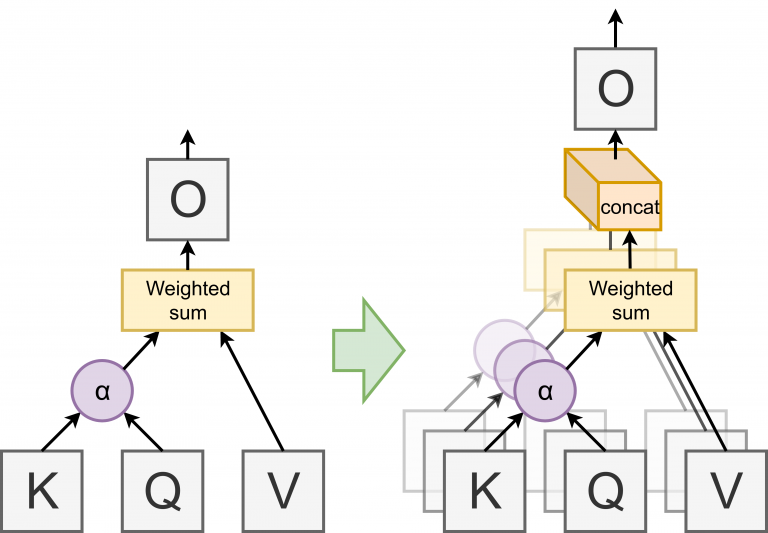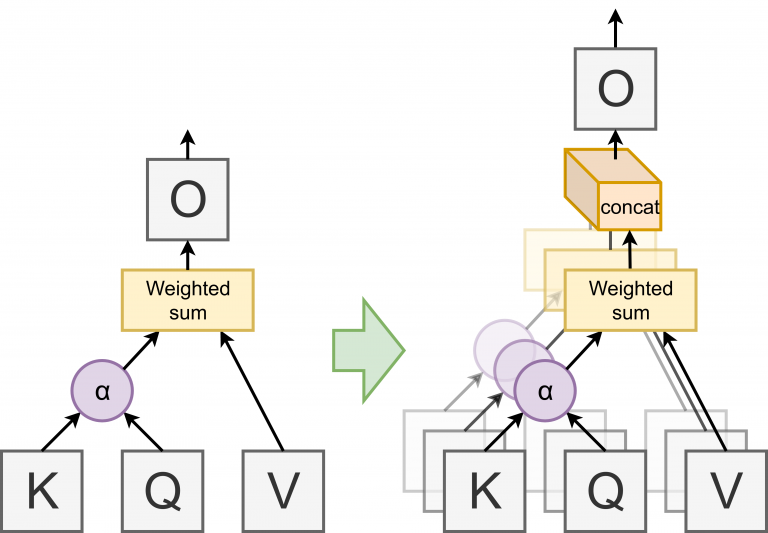

each of those head will resive a chuck of the K,Q,V vectors

In [2]:
#since now all our vector will become tensors, we will use torch to manipulete them
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
#we are going to create our input sentence length and the dims for the K, Q, and V vectors
sequence_length = 4
batch_size = 1 #we usually pass values in batches for the encoder..this speedup training
input_dim = 512
d_model = 512
#now we generate the word vector...in reality, this vector will be computed by both embedding layers
x = torch.randn((batch_size, sequence_length, input_dim))
print(f'word vector size {x.size()}')

word vector size torch.Size([1, 4, 512])


In [6]:
#now we need to map the word vector the 3 * model dim, we do this to create the K, Q, and V vectors
qkv_layer = nn.Linear(input_dim, 3*d_model)
qkv = qkv_layer(x)
print(f'qkv shape {qkv.shape}')

qkv shape torch.Size([1, 4, 1536])


In [7]:
#now we need to split this qkv vector into the even chucks so it can be fed to the attention heads
num_heads = 8
head_dims = d_model // num_heads
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3*head_dims)
print(f'qkv shape {qkv.shape}')

qkv shape torch.Size([1, 4, 8, 192])


In [15]:
#now we the qkv vector into its components
qkv = qkv.permute(0,2,1,3) #we permute the dims so its easier to compute
q,k,v = qkv.chunk(3, dim=-1)
print(f'q shape {q.shape}')
print(f'k shape {k.shape}')
print(f'v shape {v.shape}')

q shape torch.Size([1, 8, 4, 64])
k shape torch.Size([1, 8, 4, 64])
v shape torch.Size([1, 8, 4, 64])


In [19]:
#now we compute the attention vectors as same as before

#first step & second step
dk = q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2,-1))/math.sqrt(dk)
print(f'scaled matrix shape {scaled.shape}')
#third step
attention = F.softmax(scaled, dim=-1)
print(f'attention matrix shape {attention.shape}')
#final step
new_values = torch.matmul(attention, v)
print(f'new_values matrix shape {new_values.shape}')

scaled matrix shape torch.Size([1, 8, 4, 4])
attention matrix shape torch.Size([1, 8, 4, 4])
new_values matrix shape torch.Size([1, 8, 4, 64])


In [21]:
# for the amsked attetion we do ir like so

#first step & second step
dk = q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2,-1))/math.sqrt(dk)
print(f'scaled matrix shape {scaled.shape}')

#MASK
mask = torch.full(scaled.size(), float('-inf'))
mask = torch.triu(mask, diagonal=1)
print(f'mask for a single head {mask[0][0]}')
scaled += mask

#third step
attention = F.softmax(scaled, dim=-1)
print(f'attention matrix shape {attention.shape}')
print(f'mask single head attention{attention[0][0]}')
#final step
new_values = torch.matmul(attention, v)
print(f'new_values matrix shape {new_values.shape}')

scaled matrix shape torch.Size([1, 8, 4, 4])
mask for a single head tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])
attention matrix shape torch.Size([1, 8, 4, 4])
mask single head attentiontensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4288, 0.5712, 0.0000, 0.0000],
        [0.3789, 0.3808, 0.2402, 0.0000],
        [0.2189, 0.2615, 0.2375, 0.2822]], grad_fn=<SelectBackward0>)
new_values matrix shape torch.Size([1, 8, 4, 64])


In [22]:
#in the final step of the multi-head attention we need to contact all the values for each head
new_values = new_values.reshape(batch_size, sequence_length, num_heads*head_dims)
print(f'new_values matrix shape {new_values.shape}')

new_values matrix shape torch.Size([1, 4, 512])


In [23]:
#for this head to share information we pass this new vector into a linear function
linear_layer = nn.Linear(d_model, d_model)
out_values = linear_layer(new_values)
#this out_values vector is much more context-aware than the x vector
print(f'out_values matrix shape {out_values.shape}')

out_values matrix shape torch.Size([1, 4, 512])
